In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
pd.options.display.float_format = '{:.2f}'.format
warnings.simplefilter(action='ignore')
sn.set()

In [6]:
data = pd.read_csv("Scaled_Data.csv")

### Splitting data

In [8]:
train = data.sample(frac = 0.75, replace = True, random_state=43)
validate = data.sample(frac = 0.1, replace = True, random_state=44)
test = data.sample(frac = 0.15, replace = True, random_state=45)

### Splitting predictors and target

In [9]:
y_train = train["soldprice_2032"]
x_train = train.drop(["soldprice_2032"], axis = 1)

y_validate = validate["soldprice_2032"]
x_validate = validate.drop(["soldprice_2032"], axis = 1)

y_test = test["soldprice_2032"]
x_test = test.drop(["soldprice_2032"], axis = 1)

### Selecting features

In [10]:
class MultipleLinearRegression():
    
    def fit(self, x, y):
        self.w = np.linalg.solve(x.T@x, x.T@y)
        
    def predict(self, x):
        
        return np.matmul(x, self.w)

In [491]:
lr_mul = MultipleLinearRegression()

In [11]:
feats = ['lot_acres','bedrooms', 'bathrooms', 'sqrt_ft', 
         'fireplaces', "initial_price",'HOA', 'house_age', 
         'electric','convection', 'pantry', 'refrigerator',
         'purifier', 'warming', 'wet', 'porcelain', 'stone', 
         'acrylic', 'brick','carpet', 'ceramic', 'vinyl', 
         "zipcode"]

In [579]:
lr_mul.fit(x_train[feats],y_train)

In [580]:
y_hat_tr = lr_mul.predict(x_train[feats])

In [18]:
def R2(y,y_hat):
    return (1-(np.sum((y-y_hat)**2)/np.sum((y-np.mean(y))**2)))

In [19]:
R2(y_train, y_hat_tr)

NameError: name 'y_hat_tr' is not defined

In [572]:
sorted(list(zip(lr_mul.w,feats)))

[(-1.3461614504034941e-05, 'electric'),
 (-2.9026751312068555e-06, 'sqrt_ft'),
 (-1.711335768794406e-06, 'zipcode'),
 (-9.888877003010614e-07, 'fireplaces'),
 (-5.067777684432858e-07, 'convection'),
 (-4.779628355103656e-07, 'vinyl'),
 (-1.6262502709623176e-07, 'warming'),
 (-8.208460567444947e-08, 'refrigerator'),
 (-4.805112370595664e-08, 'purifier'),
 (2.0893316304316987e-08, 'carpet'),
 (4.696234458188086e-08, 'acrylic'),
 (1.6597199047792732e-07, 'HOA'),
 (2.0628823219000584e-07, 'brick'),
 (2.2927607672589792e-07, 'pantry'),
 (2.5733142061960556e-07, 'wet'),
 (2.6826636525988967e-07, 'stone'),
 (5.009391581171898e-07, 'bedrooms'),
 (7.898155210601243e-07, 'lot_acres'),
 (8.642677843968938e-07, 'porcelain'),
 (9.206896347359375e-07, 'ceramic'),
 (1.7792821149519045e-06, 'bathrooms'),
 (3.2296107051697445, 'house_age'),
 (3.4831722530319933, 'initial_price')]

In [573]:
yy = lr_mul.predict(x_validate[feats])

In [574]:
R2(y_validate,yy)

0.9999999995754235

### KNN Regressor

In [12]:
class KNNRegresor():

    def fit(self,X,y):
        self.X=X
        self.y=y
  
    def predict(self,X,K, epsilon = 1e-3):
        N=len(X)
        y_hat= np.zeros(N)
    
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2,axis=1)
            idxt= np.argsort(dist2)[:K]
            gamma_K = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
            y_hat[i]=gamma_K.dot(self.y[idxt])
    
        return y_hat

In [14]:
knn = KNNRegresor()

### Train set

In [15]:
x_train = x_train[feats].to_numpy()
y_train = y_train.to_numpy()

In [16]:
knn.fit(x_train,y_train)

In [32]:
r2_train = {k:0 for v,k in enumerate(range(2,21))}
for n in range(2,21):
    train_pred = knn.predict(x_train, n)
    r2_train[n] = R2(train_pred,y_train)

In [33]:
r2_train

{2: 0.9715765448987178,
 3: 0.9397378519803671,
 4: 0.9128752310527755,
 5: 0.8888261612612178,
 6: 0.8704596543595682,
 7: 0.8564862441790827,
 8: 0.8432079186521467,
 9: 0.8325596960570014,
 10: 0.8214532557299639,
 11: 0.8111722688423473,
 12: 0.8036401778883779,
 13: 0.7959329067807905,
 14: 0.7880499234113966,
 15: 0.7825457260876065,
 16: 0.7768860989629337,
 17: 0.7709393321948849,
 18: 0.7658068126115387,
 19: 0.7609176720892061,
 20: 0.7562206789711651}

### Validation set

In [23]:
y_validate = y_validate.to_numpy()
x_validate = x_validate[feats].to_numpy()

In [34]:
r2_val = {k:0 for v,k in enumerate(range(2,21))}
for n in range(2,21):
    val_pred = knn.predict(x_validate, n)
    r2_val[n] = R2(val_pred,y_validate)

### Test set

In [26]:
y_test = y_test.to_numpy()
x_test = x_test[feats].to_numpy()

In [27]:
test_pred = knn.predict(x_test, 2)
R2(test_pred,y_test)

0.6597508452416311

### Comparing training and validation

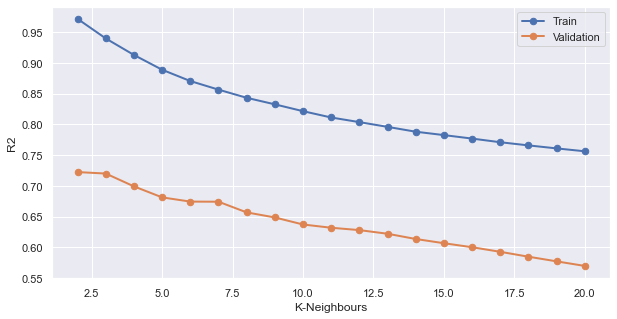

In [40]:
plt.figure(figsize = (10,5))
plt.plot(list(r2_train.keys()), list(r2_train.values()), marker = ".", markersize = 13, linewidth = 2, label = "Train")
plt.plot(list(r2_val.keys()), list(r2_val.values()), marker = ".", markersize = 13, linewidth = 2, label = "Validation")
plt.xlabel("K-Neighbours")
plt.ylabel("R2")
plt.legend()
plt.show()